<a href="https://colab.research.google.com/github/YousraAshour/machine_learning/blob/main/K_Means_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.metrics import r2_score , mean_squared_error
from scipy.spatial.distance import cdist 
from sklearn import preprocessing



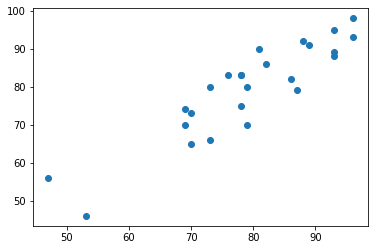

In [161]:
data=pd.read_csv(r'/MultipleLR.csv - MultipleLR.csv.csv',header=None)
data=np.asarray(data)
x=data[:,:2].reshape(-1,2)
plt.scatter(x[:,0],x[:,1])

In [162]:
# Choose K and Randomly initialize Centriods
k = 2
def KMeans(x,k,iters):
  # x= preprocessing.normalize(x)
  rand_idx = np.random.choice(x.shape[0], k, replace=False)
  centroids = x[rand_idx, :]
  loss=[]
  
  iter=0
  for i in range(iters):
    
    distances = cdist(x, centroids ,'euclidean')
    # print(centroids)
    # k_idx = np.array([np.argmin(i) for i in distance])
    k_idx=np.argmin(distances, axis=1)
    
    diff= 0
    for a in range(k):
      d= x[k_idx==a] - centroids[a]
      diff = diff + np.sum(d**2)

    dist_fun = 1/x.shape[0]* diff
    loss.append(dist_fun)

    new_centers=np.empty([k,x.shape[1]])

    for j in range(k):
        new_centers[j] = np.mean(x[k_idx == j], axis = 0)
    iter+=1
    
    if np.any(new_centers-centroids) < 1e-18:
      break
    centroids=new_centers
  plt.scatter(x[:,0],x[:,1],c=k_idx, s=40)

  # print('iters', iter)
  return centroids, dist_fun, loss


# Optimization and choosing the best Centriods 
# def best_centroid():

#   for i in range (100):




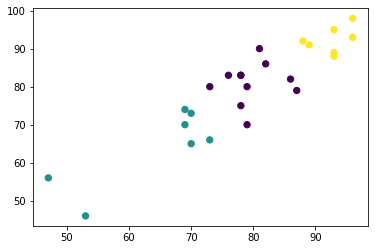

In [163]:
a,b, c= KMeans(x,3,300)

In [187]:
# plotting for different K
def Optimum_centroids(x,k,iters=300,r=100):

  centroids=[]
  distortion=[]
  for i in range(r):
    cen,dist, losses = KMeans(x,k,iters)
    centroids.append(cen)
    distortion.append(dist)

  best_centroid= centroids[np.argmin(distortion, axis=0)]
  best_dist= distortion[np.argmin(distortion, axis=0)]
  plt.scatter(best_centroid)
  return best_centroid, best_dist


In [ ]:
cen, dist=Optimum_centroids(x,k,iters=300,r=100)
cen,dist


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


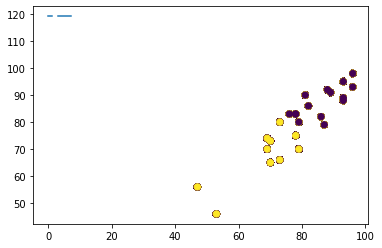

In [186]:
cens=[]
dists=[]
for i in range (10):
    cen, dist = Optimum_centroids(x,k)
    cens.append(cen)
    dists.append(dist)

plt.plot(dists) 

  